In [1]:
import pandas as pd
import os
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the JSON file
user_problem = pd.read_json('/kaggle/input/moocubexuser-problem-1/part_1.json', lines=True)

# Display the DataFrame
user_problem  # Show the first few rows

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,log_id,problem_id,user_id,is_correct,attempts,score,submit_time
0,100006906522,Pm_6906522,U_10000,0,1,NaN,2020-10-27 10:11:56
1,100006906523,Pm_6906523,U_10000,0,1,NaN,2020-10-27 10:12:13
2,100006906524,Pm_6906524,U_10000,1,1,NaN,2020-10-27 10:12:28
3,100006906525,Pm_6906525,U_10000,0,1,NaN,2020-10-27 10:14:56
4,100006906526,Pm_6906526,U_10000,0,1,NaN,2020-10-27 10:15:18
...,...,...,...,...,...,...,...
13338428,125332915880260,Pm_5880260,U_12533291,1,1,NaN,2020-11-30 16:45:30
13338429,125332915880261,Pm_5880261,U_12533291,1,1,NaN,2020-11-30 16:45:32
13338430,125332915880262,Pm_5880262,U_12533291,1,1,NaN,2020-11-30 16:45:34
13338431,125332915880263,Pm_5880263,U_12533291,1,1,NaN,2020-11-30 16:45:36


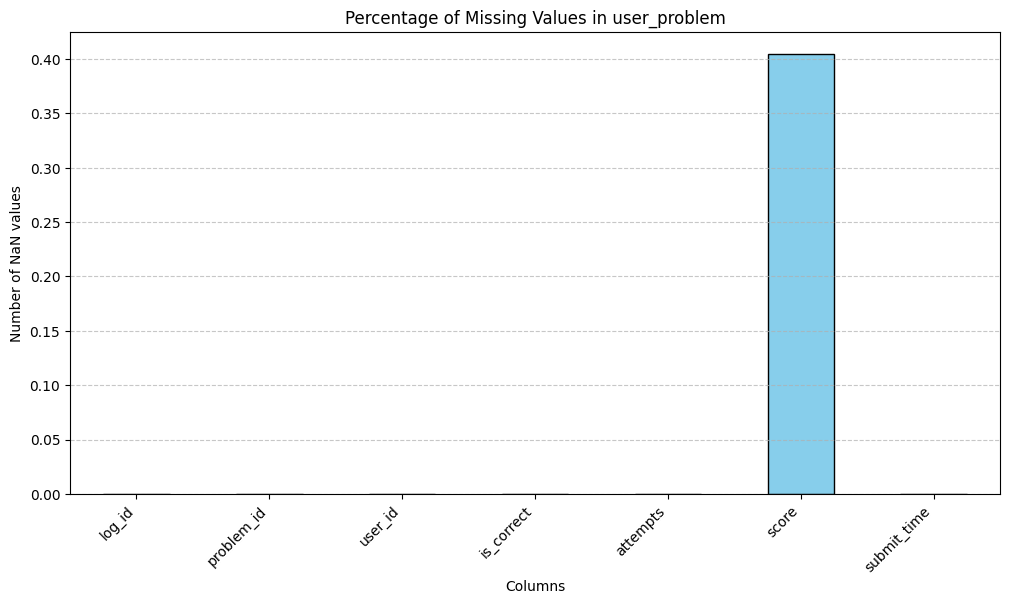

In [3]:
# Count NaN values per column
nan_counts = user_problem .isna().mean()

# Plot bar chart
plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize plot
plt.xlabel("Columns")
plt.ylabel("Number of NaN values")
plt.title("Percentage of Missing Values in user_problem")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [4]:
ex_pm = pd.read_csv("/kaggle/input/lightmooccubex/relations/exercise-problem.txt", sep="\t", header=None, names=["exercise_id", "problem_id"])

In [5]:
# Group by 'exercise_id' and aggregate 'problem_id' into lists
grouped_ex_pm = ex_pm.groupby('exercise_id')['problem_id'].agg(list).reset_index()
grouped_ex_pm

,exercise_id,problem_id
0,Ex_100000,"[Pm_128069, Pm_128070, Pm_128071, Pm_128072, P..."
1,Ex_100007,"[Pm_128074, Pm_128075, Pm_128078, Pm_128081, P..."
2,Ex_100009,"[Pm_128076, Pm_128077, Pm_128079, Pm_128080, P..."
3,Ex_100013,"[Pm_128087, Pm_128088, Pm_128089, Pm_128090, P..."
4,Ex_100018,"[Pm_128093, Pm_128094, Pm_128095, Pm_128096]"
...,...,...
888737,Ex_99971,"[Pm_128051, Pm_128052, Pm_128053]"
888738,Ex_99981,"[Pm_128055, Pm_128056, Pm_128057]"
888739,Ex_99988,"[Pm_128058, Pm_128059, Pm_128060]"
888740,Ex_99994,"[Pm_128062, Pm_128063, Pm_128064]"


In [6]:
grouped_ex_pm['num_problem'] = grouped_ex_pm['problem_id'].apply(len)
grouped_ex_pm

,exercise_id,problem_id,num_problem
0,Ex_100000,"[Pm_128069, Pm_128070, Pm_128071, Pm_128072, P...",5
1,Ex_100007,"[Pm_128074, Pm_128075, Pm_128078, Pm_128081, P...",5
2,Ex_100009,"[Pm_128076, Pm_128077, Pm_128079, Pm_128080, P...",8
3,Ex_100013,"[Pm_128087, Pm_128088, Pm_128089, Pm_128090, P...",5
4,Ex_100018,"[Pm_128093, Pm_128094, Pm_128095, Pm_128096]",4
...,...,...,...
888737,Ex_99971,"[Pm_128051, Pm_128052, Pm_128053]",3
888738,Ex_99981,"[Pm_128055, Pm_128056, Pm_128057]",3
888739,Ex_99988,"[Pm_128058, Pm_128059, Pm_128060]",3
888740,Ex_99994,"[Pm_128062, Pm_128063, Pm_128064]",3


In [7]:
grouped_ex_pm.to_csv('grouped_ex_pm.csv', index=False)

In [8]:
user_problem = user_problem .merge(ex_pm, on='problem_id', how='left')

In [9]:
user_problem

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,log_id,problem_id,user_id,is_correct,attempts,score,submit_time,exercise_id
0,100006906522,Pm_6906522,U_10000,0,1,NaN,2020-10-27 10:11:56,Ex_7007033
1,100006906523,Pm_6906523,U_10000,0,1,NaN,2020-10-27 10:12:13,Ex_7007033
2,100006906524,Pm_6906524,U_10000,1,1,NaN,2020-10-27 10:12:28,Ex_7007033
3,100006906525,Pm_6906525,U_10000,0,1,NaN,2020-10-27 10:14:56,Ex_7007033
4,100006906526,Pm_6906526,U_10000,0,1,NaN,2020-10-27 10:15:18,Ex_7007033
...,...,...,...,...,...,...,...,...
13338428,125332915880260,Pm_5880260,U_12533291,1,1,NaN,2020-11-30 16:45:30,Ex_6232275
13338429,125332915880261,Pm_5880261,U_12533291,1,1,NaN,2020-11-30 16:45:32,Ex_6232275
13338430,125332915880262,Pm_5880262,U_12533291,1,1,NaN,2020-11-30 16:45:34,Ex_6232275
13338431,125332915880263,Pm_5880263,U_12533291,1,1,NaN,2020-11-30 16:45:36,Ex_6232275


In [10]:
course_resource = pd.read_csv("/kaggle/input/filter-course-by-info/course_resource_new_id.csv")
course_resource

,course_id,resource_id
0,C_1017355,V_1617852
1,C_1017355,Ex_1617883
2,C_1017355,Ex_1617881
3,C_1017355,Ex_1617879
4,C_1017355,Ex_1617877
...,...,...
173597,C_956130,V_6304392
173598,C_956130,V_6304390
173599,C_956130,V_6304388
173600,C_956130,V_6304416


## Giữ lại những problem, exercise có trong filter_course và 

In [11]:
# Merge logs with course-resource mapping
user_problem_course = user_problem.merge(course_resource, left_on='exercise_id', right_on='resource_id', how='inner')

# Display merged DataFrame
user_problem_course

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,log_id,problem_id,user_id,is_correct,attempts,score,submit_time,exercise_id,course_id,resource_id
0,100006906522,Pm_6906522,U_10000,0,1,NaN,2020-10-27 10:11:56,Ex_7007033,C_2033958,Ex_7007033
1,100006906523,Pm_6906523,U_10000,0,1,NaN,2020-10-27 10:12:13,Ex_7007033,C_2033958,Ex_7007033
2,100006906524,Pm_6906524,U_10000,1,1,NaN,2020-10-27 10:12:28,Ex_7007033,C_2033958,Ex_7007033
3,100006906525,Pm_6906525,U_10000,0,1,NaN,2020-10-27 10:14:56,Ex_7007033,C_2033958,Ex_7007033
4,100006906526,Pm_6906526,U_10000,0,1,NaN,2020-10-27 10:15:18,Ex_7007033,C_2033958,Ex_7007033
...,...,...,...,...,...,...,...,...,...,...
1473379,125332516079133,Pm_6079133,U_12533251,1,1,6.0,2020-08-21 00:57:07,Ex_6381374,C_948109,Ex_6381374
1473380,125332516079134,Pm_6079134,U_12533251,1,1,4.0,2020-08-21 00:57:09,Ex_6381374,C_948109,Ex_6381374
1473381,125332516079135,Pm_6079135,U_12533251,1,1,6.0,2020-08-21 00:57:13,Ex_6381374,C_948109,Ex_6381374
1473382,125332516079136,Pm_6079136,U_12533251,1,1,4.0,2020-08-21 00:57:15,Ex_6381374,C_948109,Ex_6381374


In [12]:
user_problem_course = user_problem_course.drop(columns=['log_id', 'resource_id'])
user_problem_course

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,problem_id,user_id,is_correct,attempts,score,submit_time,exercise_id,course_id
0,Pm_6906522,U_10000,0,1,NaN,2020-10-27 10:11:56,Ex_7007033,C_2033958
1,Pm_6906523,U_10000,0,1,NaN,2020-10-27 10:12:13,Ex_7007033,C_2033958
2,Pm_6906524,U_10000,1,1,NaN,2020-10-27 10:12:28,Ex_7007033,C_2033958
3,Pm_6906525,U_10000,0,1,NaN,2020-10-27 10:14:56,Ex_7007033,C_2033958
4,Pm_6906526,U_10000,0,1,NaN,2020-10-27 10:15:18,Ex_7007033,C_2033958
...,...,...,...,...,...,...,...,...
1473379,Pm_6079133,U_12533251,1,1,6.0,2020-08-21 00:57:07,Ex_6381374,C_948109
1473380,Pm_6079134,U_12533251,1,1,4.0,2020-08-21 00:57:09,Ex_6381374,C_948109
1473381,Pm_6079135,U_12533251,1,1,6.0,2020-08-21 00:57:13,Ex_6381374,C_948109
1473382,Pm_6079136,U_12533251,1,1,4.0,2020-08-21 00:57:15,Ex_6381374,C_948109


In [13]:
user_problem_course.to_csv('user_problem_course', index = False)

In [14]:
# Read the JSON file
problem = pd.read_json('/kaggle/input/lightmooccubex/entities/problem.json', lines=True)

# Display the DataFrame
problem  # Show the first few rows

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,problem_id,title,content,option,answer,score,type,typetext,location,context_id,exercise_id,language
0,1730,第一课 导论与三家分晋--习题,1、《资治通鉴》卷1记载：智宣子将以瑶为后，智果曰：“……瑶之贤于人者五，其不逮者一也。美鬓...,"{'A': '武艺超群，精通射御之术', 'B': '礼贤下士，虚怀若谷', 'C': '反...","[""B""]",1.0,1,单选题,1.4,"[8045581, 8045582, 8045583]",Ex_856,Chinese
1,1731,第一课 导论与三家分晋--习题,2、《资治通鉴》是一部____史书。,"{'A': '纪传体', 'B': '编年体', 'C': '纪事本末体', 'D': '国...","[""B""]",1.0,1,单选题,1.4,"[8045581, 8045582, 8045583]",Ex_856,Chinese
2,1732,第一课 导论与三家分晋--习题,3、《资治通鉴》原名____，后由____赐名“资治通鉴”。,"{'A': '《通鉴》；宋神宗', 'B': '《通志》；宋徽宗', 'C': '《通鉴》；...","[""D""]",1.0,1,单选题,1.4,"[8045581, 8045582, 8045583]",Ex_856,Chinese
3,1733,第一课 导论与三家分晋--习题,4、“三家分晋”中“三家”具体指：,"{'A': '魏赵韩', 'B': '魏韩智', 'C': '赵韩智', 'D': '魏赵智'}","[""A""]",1.0,1,单选题,1.4,"[8045581, 8045582, 8045583]",Ex_856,Chinese
4,1734,第一课 导论与三家分晋--习题,5、智伯联合韩、魏的军队攻打赵氏时，赵襄子选择退守的阵地是：,"{'A': '邯郸', 'B': '长子', 'C': '晋阳', 'D': '皋狼'}","[""C""]",1.0,1,单选题,1.4,"[8045581, 8045582, 8045583]",Ex_856,Chinese
...,...,...,...,...,...,...,...,...,...,...,...,...
2454417,8431749,第八章第十节测试题,"Among the following works, which is not Swift'...","{'A': 'A Modest Proposal', 'B': 'A Tale of a T...","[""C""]",NaN,1,单选题,8.9.1,"[6178241, 6178241]",Ex_8634505,English
2454418,8431750,第八章第十节测试题,"From the dialogue, we know that Swift's best k...","{'A': 'Gulliver's Travels', 'B': 'Drapier's Le...","[""A""]",NaN,1,单选题,8.9.1,"[6178241, 6178241]",Ex_8634505,English
2454419,8431751,第八章第十节测试题,"In this novel, Gulliver travelled to ( ).","{'A': 'Lilliput, Brobdingnag, and Laputa', 'B'...","[""C""]",NaN,1,单选题,8.9.1,"[6178241, 6178241]",Ex_8634505,English
2454420,8431752,第八章第十节测试题,"From the conversation, we know that Eve really...","{'A': 'the Houyhnhnms', 'B': 'the Yahoos', 'C'...","[""B""]",NaN,1,单选题,8.9.1,"[6178241, 6178241]",Ex_8634505,English


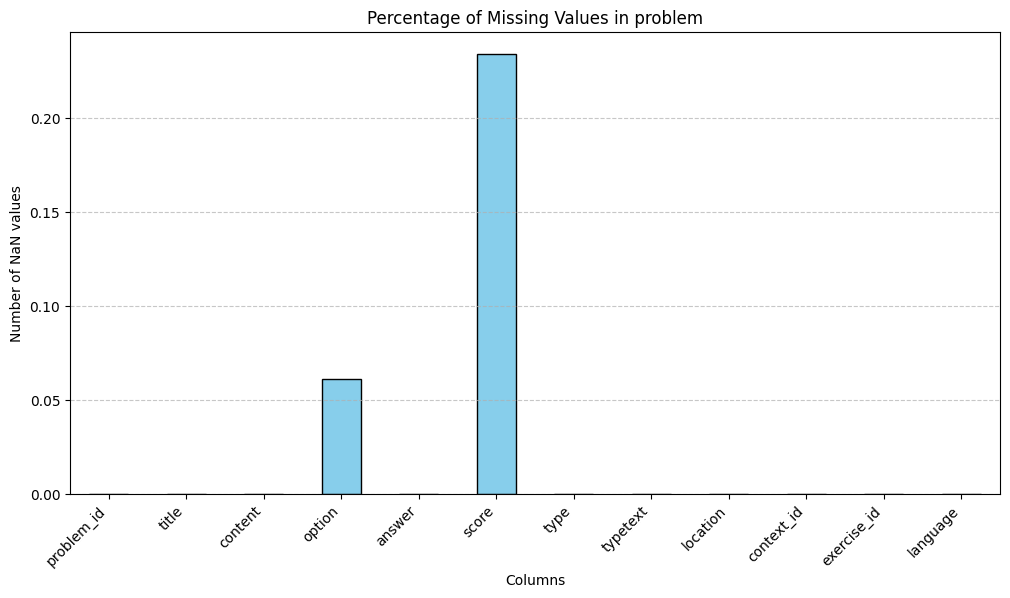

In [15]:
# Count NaN values per column
nan_counts = problem.isna().mean()

# Plot bar chart
plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize plot
plt.xlabel("Columns")
plt.ylabel("Number of NaN values")
plt.title("Percentage of Missing Values in problem")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [16]:
problem['problem_id'] = 'Pm_' + problem['problem_id'].astype(str)
problem

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,problem_id,title,content,option,answer,score,type,typetext,location,context_id,exercise_id,language
0,Pm_1730,第一课 导论与三家分晋--习题,1、《资治通鉴》卷1记载：智宣子将以瑶为后，智果曰：“……瑶之贤于人者五，其不逮者一也。美鬓...,"{'A': '武艺超群，精通射御之术', 'B': '礼贤下士，虚怀若谷', 'C': '反...","[""B""]",1.0,1,单选题,1.4,"[8045581, 8045582, 8045583]",Ex_856,Chinese
1,Pm_1731,第一课 导论与三家分晋--习题,2、《资治通鉴》是一部____史书。,"{'A': '纪传体', 'B': '编年体', 'C': '纪事本末体', 'D': '国...","[""B""]",1.0,1,单选题,1.4,"[8045581, 8045582, 8045583]",Ex_856,Chinese
2,Pm_1732,第一课 导论与三家分晋--习题,3、《资治通鉴》原名____，后由____赐名“资治通鉴”。,"{'A': '《通鉴》；宋神宗', 'B': '《通志》；宋徽宗', 'C': '《通鉴》；...","[""D""]",1.0,1,单选题,1.4,"[8045581, 8045582, 8045583]",Ex_856,Chinese
3,Pm_1733,第一课 导论与三家分晋--习题,4、“三家分晋”中“三家”具体指：,"{'A': '魏赵韩', 'B': '魏韩智', 'C': '赵韩智', 'D': '魏赵智'}","[""A""]",1.0,1,单选题,1.4,"[8045581, 8045582, 8045583]",Ex_856,Chinese
4,Pm_1734,第一课 导论与三家分晋--习题,5、智伯联合韩、魏的军队攻打赵氏时，赵襄子选择退守的阵地是：,"{'A': '邯郸', 'B': '长子', 'C': '晋阳', 'D': '皋狼'}","[""C""]",1.0,1,单选题,1.4,"[8045581, 8045582, 8045583]",Ex_856,Chinese
...,...,...,...,...,...,...,...,...,...,...,...,...
2454417,Pm_8431749,第八章第十节测试题,"Among the following works, which is not Swift'...","{'A': 'A Modest Proposal', 'B': 'A Tale of a T...","[""C""]",NaN,1,单选题,8.9.1,"[6178241, 6178241]",Ex_8634505,English
2454418,Pm_8431750,第八章第十节测试题,"From the dialogue, we know that Swift's best k...","{'A': 'Gulliver's Travels', 'B': 'Drapier's Le...","[""A""]",NaN,1,单选题,8.9.1,"[6178241, 6178241]",Ex_8634505,English
2454419,Pm_8431751,第八章第十节测试题,"In this novel, Gulliver travelled to ( ).","{'A': 'Lilliput, Brobdingnag, and Laputa', 'B'...","[""C""]",NaN,1,单选题,8.9.1,"[6178241, 6178241]",Ex_8634505,English
2454420,Pm_8431752,第八章第十节测试题,"From the conversation, we know that Eve really...","{'A': 'the Houyhnhnms', 'B': 'the Yahoos', 'C'...","[""B""]",NaN,1,单选题,8.9.1,"[6178241, 6178241]",Ex_8634505,English


In [17]:
# Merge user_problem_course with problem DataFrame
user_problem_course = user_problem_course.merge(
    problem.add_suffix('_pm_info'),  # Add suffix to all columns
    left_on="problem_id", 
    right_on="problem_id_pm_info",  # Keep original problem_id
    how="left"
)

# Drop the duplicate problem_id column from problem (if necessary)
user_problem_course = user_problem_course.drop(columns=["problem_id_pm_info"])

# Display the updated DataFrame
user_problem_course

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,problem_id,user_id,is_correct,attempts,score,submit_time,exercise_id,course_id,title_pm_info,content_pm_info,option_pm_info,answer_pm_info,score_pm_info,type_pm_info,typetext_pm_info,location_pm_info,context_id_pm_info,exercise_id_pm_info,language_pm_info
0,Pm_6906522,U_10000,0,1,NaN,2020-10-27 10:11:56,Ex_7007033,C_2033958,第八章习题,"党的十九大报告指出,全党必须牢记,()的问题是检验一个政党、一个政权性质的试金石。","{'A': '为什么人', 'B': '依法治国', 'C': '建党宗旨', 'D': '...","[""A""]",1.0,1.0,单选题,7.4,"[7007037, 7007038, 7007039, 7007040]",Ex_7007033,Chinese
1,Pm_6906523,U_10000,0,1,NaN,2020-10-27 10:12:13,Ex_7007033,C_2033958,第八章习题,"《危险化学品企业事故隐患排查治理实施导则》规定,涉及重点监管危险化工工艺、重点监管危险化学品...","{'A': '应急演练', 'B': '隐患排查', 'C': '危险与可操作性分析', '...","[""C""]",1.0,1.0,单选题,7.4,"[7007037, 7007038, 7007039, 7007040]",Ex_7007033,Chinese
2,Pm_6906524,U_10000,1,1,NaN,2020-10-27 10:12:28,Ex_7007033,C_2033958,第八章习题,"根据我国和化工行业标准《责任关怀实施准则》,企业应对其提供的产品给予安全监管支持,当发现产品...","{'A': '向主管部门举报', 'B': '终止产品的销售', 'C': '向新闻媒体公开...","[""B""]",1.0,1.0,单选题,7.4,"[7007037, 7007038, 7007039, 7007040]",Ex_7007033,Chinese
3,Pm_6906525,U_10000,0,1,NaN,2020-10-27 10:14:56,Ex_7007033,C_2033958,第八章习题,"责任关怀旨在改善各化工企业生产经营活动中的健康安全及环境表现,提高()对化工行业的认识和参与水平。","{'A': '当地社区', 'B': '公众', 'C': '全社会', 'D': '其他行业'}","[""A""]",1.0,1.0,单选题,7.4,"[7007037, 7007038, 7007039, 7007040]",Ex_7007033,Chinese
4,Pm_6906526,U_10000,0,1,NaN,2020-10-27 10:15:18,Ex_7007033,C_2033958,第八章习题,我国注册化工工程师应履行以下义务（ ）,"{'A': '遵守法律、法规和职业道德，维护社会公众利益', 'B': '保证执业工作的质量...","[""A"", ""B"", ""C""]",2.0,2.0,多选题,7.4,"[7007037, 7007038, 7007039, 7007040]",Ex_7007033,Chinese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473379,Pm_6079133,U_12533251,1,1,6.0,2020-08-21 00:57:07,Ex_6381374,C_948109,小测验：人工智能,下列关于人工智能叙述正确的是（ ）,"{'A': '人工智能技术它与其他科学技术相结合极大地提高了应用技术的智能化水平', 'B'...","[""A"", ""B"", ""D""]",6.0,2.0,多选题,3.2.4,"[6765704, 6765705, 6765706, 6765707]",Ex_6381374,Chinese
1473380,Pm_6079134,U_12533251,1,1,4.0,2020-08-21 00:57:09,Ex_6381374,C_948109,小测验：人工智能,图灵曾协助军方破解了英国的密码系统,"{'true': '正确', 'false': '错误'}","[""false""]",4.0,6.0,判断题,3.2.4,"[6765704, 6765705, 6765706, 6765707]",Ex_6381374,Chinese
1473381,Pm_6079135,U_12533251,1,1,6.0,2020-08-21 00:57:13,Ex_6381374,C_948109,小测验：人工智能,AlphaGo战胜了（）两位棋手,"{'A': '李世石', 'B': '黄士杰', 'C': '柯洁', 'D': '深蓝'}","[""A"", ""C""]",6.0,2.0,多选题,3.2.4,"[6765704, 6765705, 6765706, 6765707]",Ex_6381374,Chinese
1473382,Pm_6079136,U_12533251,1,1,4.0,2020-08-21 00:57:15,Ex_6381374,C_948109,小测验：人工智能,目前所有的人工智能都已经产生意识,"{'true': '正确', 'false': '错误'}","[""false""]",4.0,6.0,判断题,3.2.4,"[6765704, 6765705, 6765706, 6765707]",Ex_6381374,Chinese


In [18]:
user_problem_course.shape

(1473384, 19)

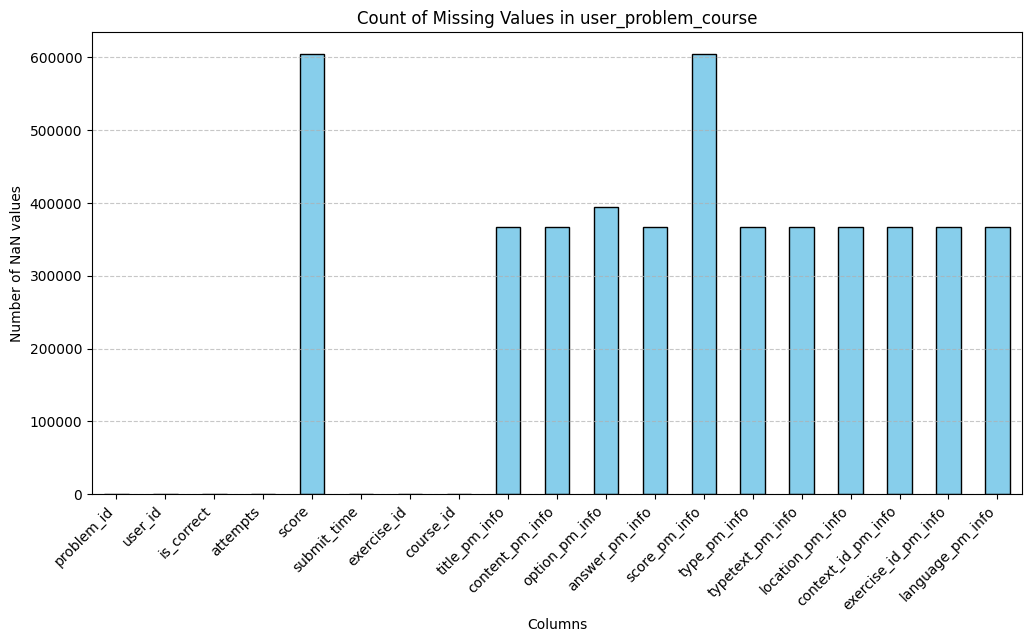

In [19]:
# Count NaN values per column
nan_counts = user_problem_course.isna().sum()

# Plot bar chart
plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize plot
plt.xlabel("Columns")
plt.ylabel("Number of NaN values")
plt.title("Count of Missing Values in user_problem_course")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

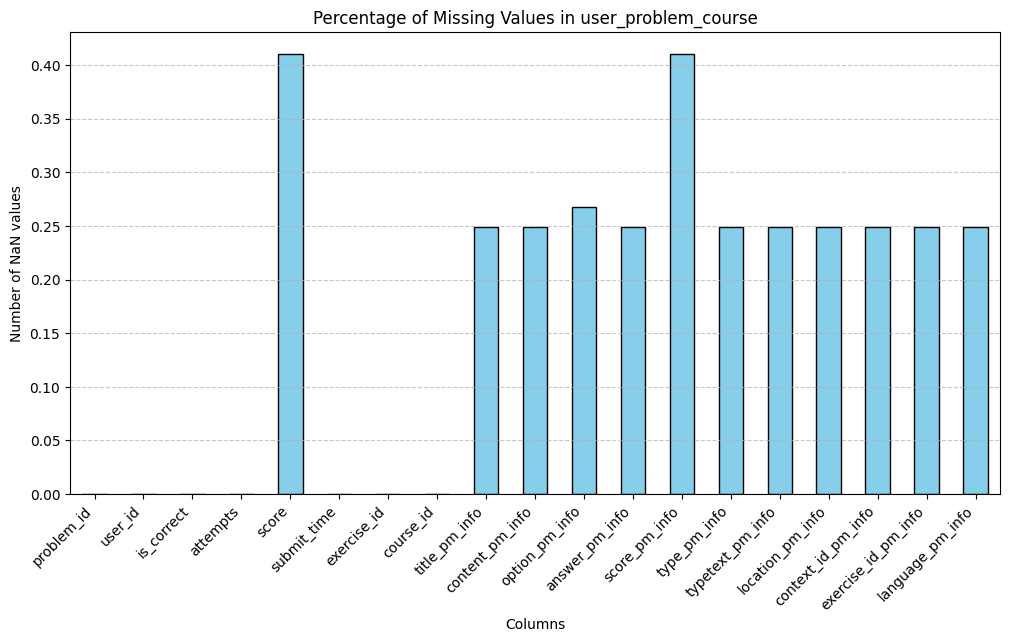

In [20]:
# Count NaN values per column
nan_counts = user_problem_course.isna().mean()

# Plot bar chart
plt.figure(figsize=(12, 6))
nan_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize plot
plt.xlabel("Columns")
plt.ylabel("Number of NaN values")
plt.title("Percentage of Missing Values in user_problem_course")
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [21]:
user_problem_course.to_csv('user_problem_course_detail', index = False)

In [22]:
# Count occurrences of each course_id
course_counts = user_problem_course['course_id'].value_counts().reset_index()

# Rename columns for clarity
course_counts.columns = ['course_id', 'count_course_id']

# Display the result
course_counts

,course_id,count_course_id
0,C_707456,174712
1,C_2286754,143147
2,C_797404,126977
3,C_1794790,87057
4,C_1822804,84596
...,...,...
558,C_948141,1
559,C_735357,1
560,C_707054,1
561,C_2328554,1


In [23]:
course_counts.to_csv("count_course_problem.csv", index = False)